In [45]:
#importing all the necesarry libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import numpy as np
from sklearn.model_selection import GridSearchCV

In [46]:
#loading train dataset saved loacally
path = 'data/'
filename = 'named_train.csv'
df = pd.read_csv(path+filename)

In [47]:
#loading test dataset saved locally
path = 'data/'
filename = 'named_test.csv'
df_test= pd.read_csv(path+filename)

In [48]:
#observing the number of observations and features in train dataset
print(f'There are {df.shape[0]} observations and {df.shape[1]} features')

There are 112800 observations and 785 features


In [49]:
#observing the number of observations and features in test dataset
print(f'There are {df_test.shape[0]} observations and {df_test.shape[1]} features')

There are 18800 observations and 785 features


In [50]:
#glimpse of how train dataset looks like
df.head(2)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


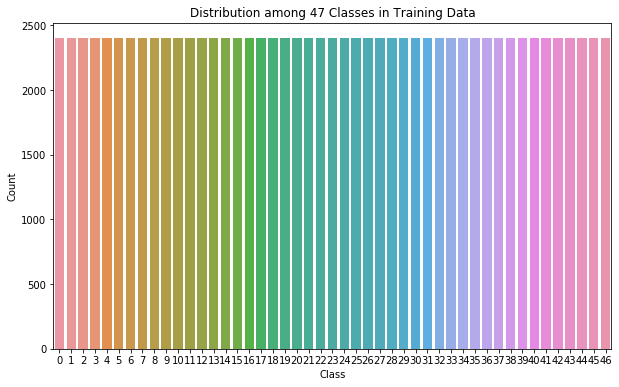

In [51]:
# Histogram of labeled output in training data showing equal distribution among 47 labels (classes)
plt.rcParams['figure.figsize'] = (10,6)
ax = sns.countplot(x='Target',data=df)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Distribution among 47 Classes in Training Data');

In [52]:
#glimpse of how test dataset looks like
df_test.head(2)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#list of all unique values in output column
list_of_unique= df['Target'].unique()
list_of_unique

array([45, 36, 43, 15,  4, 42, 26, 32, 20,  1, 46, 13, 24, 12,  5, 17,  3,
       40, 14, 44, 19, 29, 25, 35, 28, 23, 22, 34,  9, 30, 38, 39, 37, 31,
       16,  7,  2,  8, 10,  6, 27, 33, 11, 18, 41,  0, 21], dtype=int64)

In [54]:
len(list_of_unique)

47

In [55]:
#Creating an empty dataset named subset_data
subset_data=pd.DataFrame()
subset_data

""


In [56]:
#For each unique value in output column select first 200 rows and store them in subset_data
for i in list_of_unique:
    subset=df[df['Target']==i].iloc[:200]
    subset_data= pd.concat([subset_data,subset])

In [57]:
subset_data.shape

(9400, 785)

In [58]:
subset_data.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


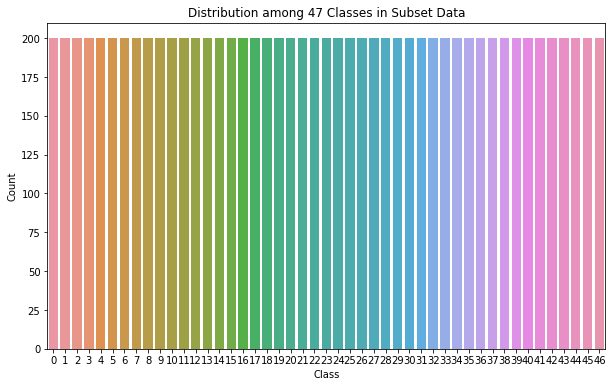

In [59]:
# Histogram of labeled output in training data showing equal distribution among 47 labels (classes)
plt.rcParams['figure.figsize'] = (10,6)
ax = sns.countplot(x='Target',data=subset_data)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Distribution among 47 Classes in Subset Data');

In [60]:
#defining the target variable in the subset of train dataset
y_column = 'Target'
y_train = subset_data[y_column]
y_train

0       45
94      45
105     45
109     45
165     45
        ..
9190    21
9236    21
9242    21
9276    21
9364    21
Name: Target, Length: 9400, dtype: int64

In [61]:
# Defining the independent variables in the subset of train dataset
x_columns = subset_data.iloc[:, 1:785] 
X_train = x_columns
X_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#list of all unique values in output column for test dataset
list_of_unique_test= df_test['Target'].unique()
list_of_unique_test

array([41, 39,  9, 26, 44, 33, 14, 11,  3, 12, 16,  7,  2, 27,  6, 28, 45,
       29,  8,  4, 35, 40, 37, 21, 43, 20,  1, 23,  5, 25, 31, 17, 34,  0,
       18, 36, 38, 19, 32, 13, 42, 24, 10, 46, 30, 15, 22], dtype=int64)

In [63]:
len(list_of_unique_test)

47

In [64]:
#creating the subset dataset for test data
subset_data_test=pd.DataFrame()

In [65]:
# for every unique output value in test dataset choose 100 observations
for i in list_of_unique_test:
    subset_test=df_test[df_test['Target']==i].iloc[:100]
    subset_data_test= pd.concat([subset_data_test,subset_test])

In [66]:
subset_data_test.shape

(4700, 785)

In [67]:
subset_data_test.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
355,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#defining the target variable in test dataset
y_column = 'Target'
y_test = subset_data_test[y_column]

In [69]:
#defining the independent variables in test dataset
x_columns = subset_data_test.iloc[:, 1:785] 
X_test = x_columns

In [70]:
# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')

In [71]:
# fitting the model to train dataset
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [72]:
#Using the model to predict on train and test dataset
y_pred_train=clf.predict (X_train)
y_pred = clf.predict (X_test)

In [73]:
from sklearn import metrics
print ("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print ("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.6702127659574468


In [74]:
#calculating confusion matrix
print (metrics.confusion_matrix(y_test, y_pred))

[[49  0  0 ...  0  0  0]
 [ 0 59  0 ...  0  0  0]
 [ 0  0 63 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  2  0]
 [ 0  0  0 ...  0 82  0]
 [ 0  4  0 ...  1  2 52]]


In [75]:
#calculating precision and recall and printing the results
cm = metrics.confusion_matrix(y_test, y_pred)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall:",np.mean(recall))
print("Precision:",np.mean(precision))

Recall: 0.6702127659574468
Precision: 0.6724447588949944


In [76]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.49      0.47       100
           1       0.43      0.59      0.50       100
           2       0.65      0.63      0.64       100
           3       0.78      0.93      0.85       100
           4       0.66      0.72      0.69       100
           5       0.62      0.66      0.64       100
           6       0.71      0.82      0.76       100
           7       0.78      0.90      0.83       100
           8       0.69      0.78      0.73       100
           9       0.54      0.58      0.56       100
          10       0.68      0.78      0.73       100
          11       0.76      0.74      0.75       100
          12       0.76      0.82      0.79       100
          13       0.75      0.80      0.78       100
          14       0.77      0.67      0.72       100
          15       0.42      0.49      0.45       100
          16       0.75      0.67      0.71       100
          17       0.71    

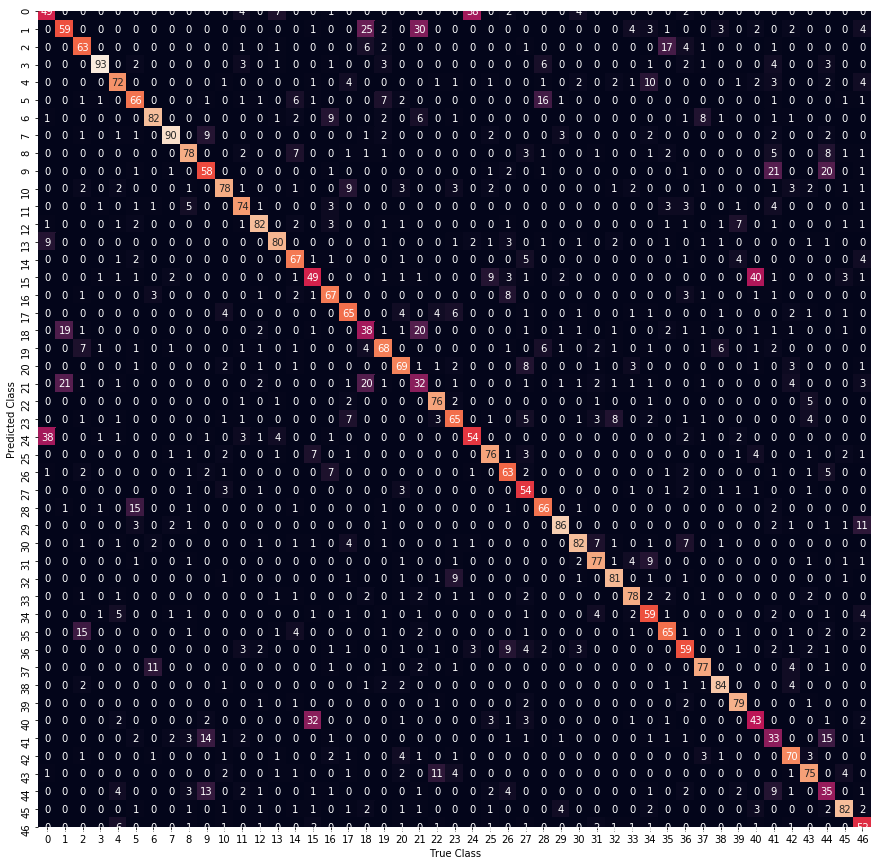

In [77]:
# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (15,15)
mat=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True, fmt='d',cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

In [78]:
# Create a Radial SVM classifier
clf_r = svm.SVC(kernel='rbf')

In [79]:
# fitting the model to train dataset
clf_r.fit(X_train, y_train)

D:\install\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [80]:
#Using the model to predict on train and test dataset
y_pred_train_r=clf_r.predict (X_train)
y_pred_r = clf_r.predict (X_test)

In [81]:
from sklearn import metrics
print ("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train_r))
print ("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_r))

Train Accuracy: 1.0
Test Accuracy: 0.043617021276595745


In [82]:
#calculating confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_r))

[[  0   0   0 ...   0   0 100]
 [  0  48   0 ...   0   0  12]
 [  0   0   0 ...   0   0 100]
 ...
 [  0   0   0 ...   0   0 100]
 [  0   0   0 ...   0   1  99]
 [  0   0   0 ...   0   0 100]]


In [83]:
#calculating precision and recall and printing the results
cm = metrics.confusion_matrix(y_test, y_pred_r)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall:",np.mean(recall))
print("Precision:",np.mean(precision))

Recall: 0.04361702127659574
Precision: nan


D:\install\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [84]:
print(metrics.classification_report(y_test,y_pred_r))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.52      0.48      0.50       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       1.00      0.01      0.02       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.00      0.00      0.00       100
          17       0.00    

D:\install\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


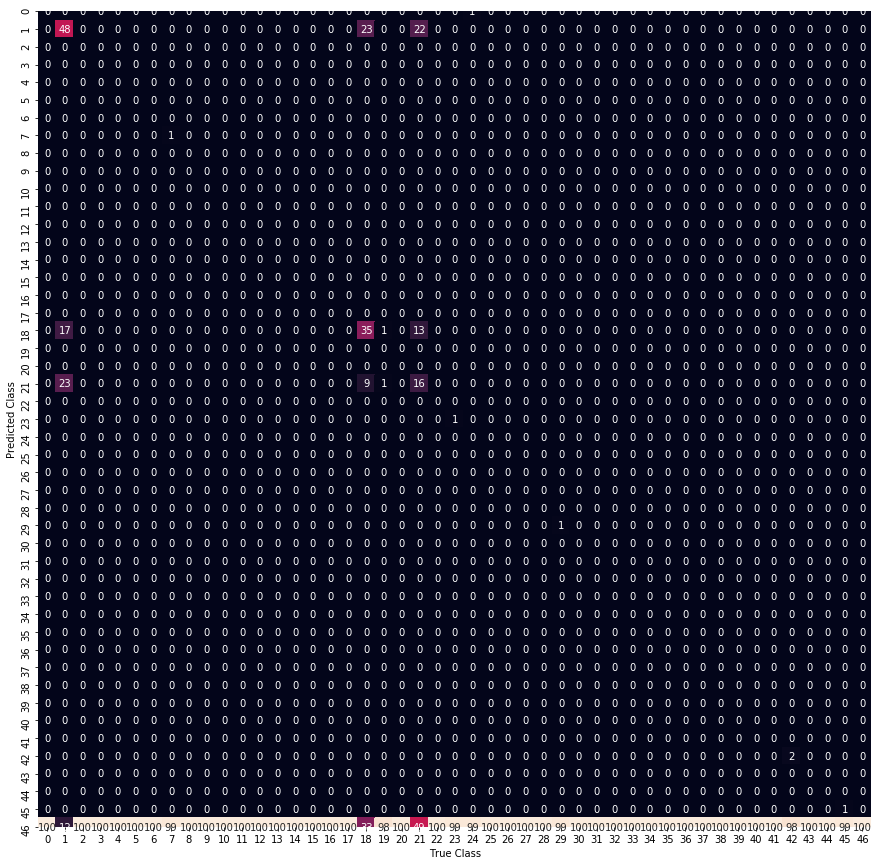

In [85]:
# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (15,15)
mat=metrics.confusion_matrix(y_test,y_pred_r)
sns.heatmap(mat.T,square=True,annot=True, fmt='d',cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

In [94]:
# Create a Polynomial SVM classifier with a degree of 5
clf_p = svm.SVC(kernel='poly',degree=5)

In [95]:
# fitting the model to train dataset
clf_p.fit(X_train, y_train)

D:\install\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [98]:
#Using the model to predict on train and test dataset
y_pred_train_p=clf_p.predict (X_train)
y_pred_p = clf_p.predict (X_test)

In [99]:
from sklearn import metrics
print ("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train_p))
print ("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_p))

Train Accuracy: 1.0
Test Accuracy: 0.6780851063829787


In [100]:
#calculating confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_p))

[[57  0  0 ...  0  2  0]
 [ 0 57  0 ...  1  0  0]
 [ 3  0 64 ...  0  0  0]
 ...
 [ 0  2  1 ... 35  1  4]
 [ 0  0  0 ...  0 84  2]
 [ 0  7  0 ...  2  5 56]]


In [101]:
#calculating precision and recall and printing the results
cm = metrics.confusion_matrix(y_test, y_pred_p)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall:",np.mean(recall))
print("Precision:",np.mean(precision))

Recall: 0.6780851063829788
Precision: 0.7092141379784002


In [102]:
print(metrics.classification_report(y_test,y_pred_p))

              precision    recall  f1-score   support

           0       0.47      0.57      0.52       100
           1       0.47      0.57      0.52       100
           2       0.70      0.64      0.67       100
           3       0.81      0.92      0.86       100
           4       0.71      0.68      0.69       100
           5       0.67      0.59      0.63       100
           6       0.76      0.81      0.79       100
           7       0.82      0.90      0.86       100
           8       0.71      0.73      0.72       100
           9       0.58      0.66      0.62       100
          10       0.74      0.73      0.73       100
          11       0.76      0.72      0.74       100
          12       0.83      0.80      0.82       100
          13       0.86      0.69      0.77       100
          14       0.80      0.76      0.78       100
          15       0.48      0.41      0.44       100
          16       0.77      0.68      0.72       100
          17       0.80    

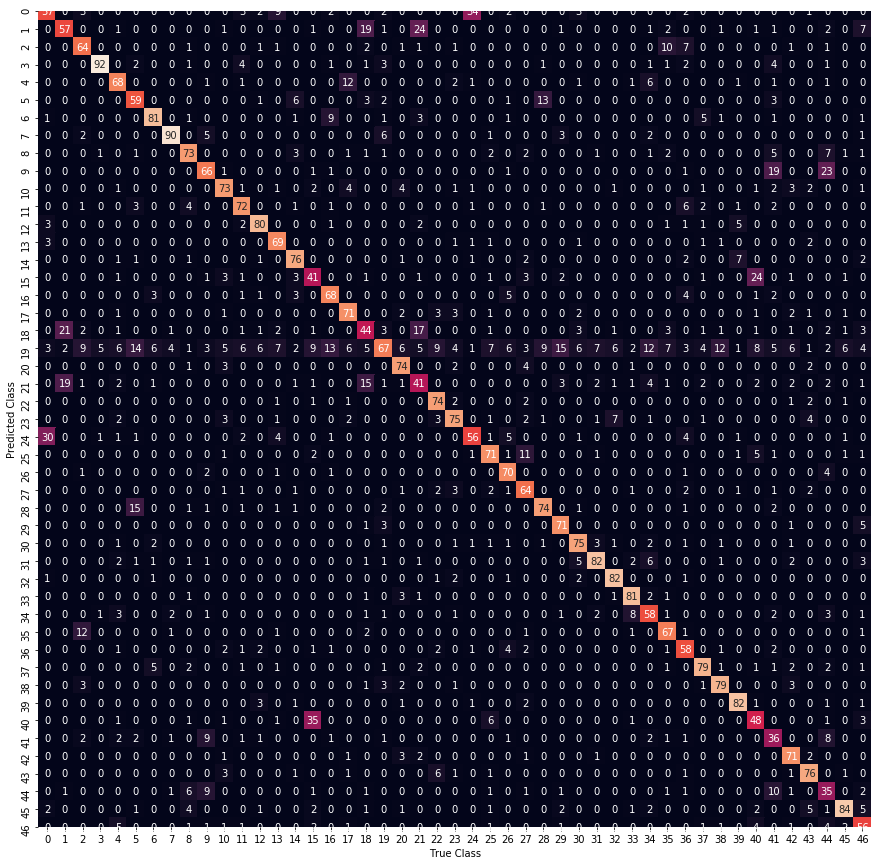

In [103]:
# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (15,15)
mat=metrics.confusion_matrix(y_test,y_pred_p)
sns.heatmap(mat.T,square=True,annot=True, fmt='d',cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()